# Network Analysis

---


## Introduction

Networks are a measurable representation of patterns of relationhips connecting entities in an abstract or actual space. The constituent parts of a network are nodes which are connected by ties, or edges. Networks have been used to model airplane traffic from airports, supply chains, friendship networks, amorphous materials like window glass, cells, and proteins. The importance of networks analysis is that it captures the effect of where and how an individual actor is positioned among others. 

Networks can be represented as **graphs**, where a graph is made up of **nodes** connected by **ties**. There are several type of graphs: connected, unconnected, directional, and many more (see [glossary](#glossary-of-terms) for a list of terms). 

In this tutorial we are going to examine the friendship network of 34 students in a karate class. A political rivalry arose in the class and divided the class into two factions, eventually leading to the club fissuring into two separate karate classes. The club held periodic meetings to vote on policy decisions. When one of the faction heads, individuals 1 and 34, called a meeting, they would communicate the information only to members firmly in their faction, in order to ensure that the majority of members attending the meeting were in their faction, thereby guaranteeing that their policies would pass. Meeting times were not publicly announced, but spread from friend to friend in the social network. In this tutorial we will explore graphical representations of this network, degree metrics, centrality metrics, how to calculate the shortest path between nodes, and community detection. We will be using the NetworkX Python Library developed at Los Alamos National Laboratory (LANL). 

[Dataset Link](http://www-personal.umich.edu/~mejn/netdata/)
[Original Publication](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf)

## Glossary of Terms
- A **node** is an individual entity within a graph.

- A **tie** is a link between nodes. Ties can be **undirected**, meaning they represent a symmetrical
relationship, or **directed**, meaning they represent an asymmetrical relationship (one that doesn't necessarily
go both ways). A directed tie is known as an arc. An undirected tie is known as an edge.

- The **degree** of a node is the number of ties that are connected to that node.

- A **directed graph** has directed ties, which depict an asymmetrical relationship. For instance, I may 
follow Barack Obama on Instagram, but that does not necessarily mean that he follows me. 

- An **undirected graph** has ties that depict a symmetrical or reciprocal relationship. For instance, if I am Facebook friends with Barack Obama, then he is also Facebook friends with me.

- A **walk** is a route between two vertices. 

- A **trail** between two vertices is a route in which no *tie* is repeated. 

- A **path** between two vertices is a route in which no *node* is repeated. 

- A **cutpoint** is a *node* that cannot be removed without disconnecting the network. 

- A **bridge** is a *tie* that cannot be removed without disconnecting the network. 

- **Network density** is the number of actual connections/potential connections. 

- **Average distance** is the average path length between nodes in a graph. It is a measure of how many nodes it take to transmit information across the network. 

- **Centrality** is the degree to which a network revolves around a given node. 

## Table of Contents

1. [Loading the Data](#Loading-the-data)
2. [Representations of Networks](#Representations-of-Networks)
    1. [Adjacency Matrix](#Adjacency-matrix)
    2. [List of Edges](#List-of-edges)
    3. [Graphs](#Graphs)
3. [Summary Statistics](#Summary-Statistics)
4. [Degree Distribution](#Degree-Distribution)
5. [Shortest Paths](#Shortest-Paths)
    1. [Average Shortest Path Length](#Average-Shortest-Path-Length)
6. [Centrality Metrics](#Centrality-metrics)
    1. [Degree Centrality](#Degree-Centrality)
    2. [Closeness Centrality](#Closeness-Centrality)
    3. [Betwenness Centrality](#Betwenness-Centrality)
7. [Community Detection](#Community-Detection)

In [3]:
%pylab inline
from __future__ import print_function
import sys
import community
import networkx as nx
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named community

# Loading the Data 

Our data comes from a social network analysis of a karate class. The nodes represent individuals and the ties represent freindships. The data is stored in [gml format](https://en.wikipedia.org/wiki/Graph_Modelling_Language).

In [4]:
Graph_Karate = nx.read_gml('karate.gml', label='id')
Graph_Karate.name = 'SocialCircles_KarateClass'

# Representations of Networks
 

## Adjacency Matrix
One way to represent networks is an **adjacency matrix**, a binary (all entries are either 0 or 1) square matrix. Each row represents the connections between one node and the other nodes in the network. For instance, the first row represents the first node. Each entry in a row corresponding to a node represents possible connections to the other nodes as indicated by 1 (connected) or 0 (not connected).  

In [5]:
adj_matrix = nx.adjacency_matrix(Graph_Karate).todense()
np.set_printoptions(threshold=numpy.nan)
print(adj_matrix)

[[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 

Note that in the matrix above, all the diagonal entries are 0. This means that we do not consider a node "connected to itself." 

Is this graph directed? It's hard to tell by looking at the sea of 0s and 1s above. Below we demonstrate plotting the adjacency matrix as a heat map, which shows symmetry across the diagonal. This shows that, in the karate class, there are no one-way friendships: if someone is your friend, you are also their friend.

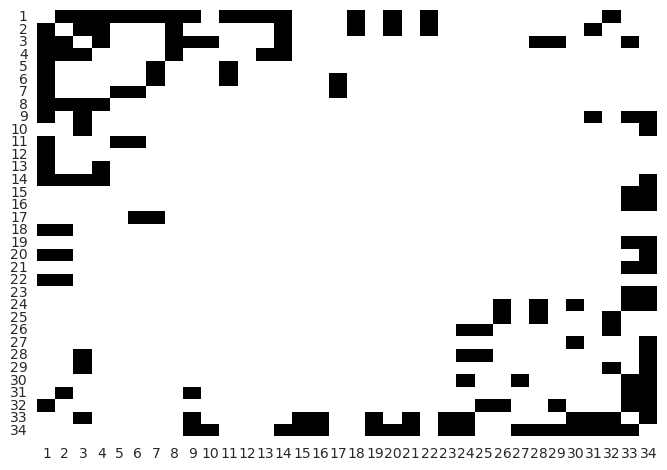

In [11]:
# Plot the adjacency matrix as a heat map
sns.heatmap(adj_matrix,
            cbar=False,
            cmap = plt.get_cmap('Greys'),
            yticklabels=Graph_Karate.nodes(),
            xticklabels=Graph_Karate.nodes(),
            fmt='d')

## List of Edges
Graphs can also be represented as **edge lists**, where you list the connections between nodes exhaustively. If we know the graph is undirected, we only need to list each relationship one time. For example, we say that 1 is connected to 32, but it would be redundant to also say that 32 is connected to 1. 

In [1]:
# Writing the karate class graph as a list of edges
nx.write_edgelist(Graph_Karate,
                 sys.stdout)

NameError: name 'nx' is not defined

## Graphs
Networks can also be represented as graphs, which is probably the most intuitive way to visualize them. The top visualization emphasizes the nodes and how close they are to one another, and the bottom visualization emphasizes the edges, or the connections themselves.

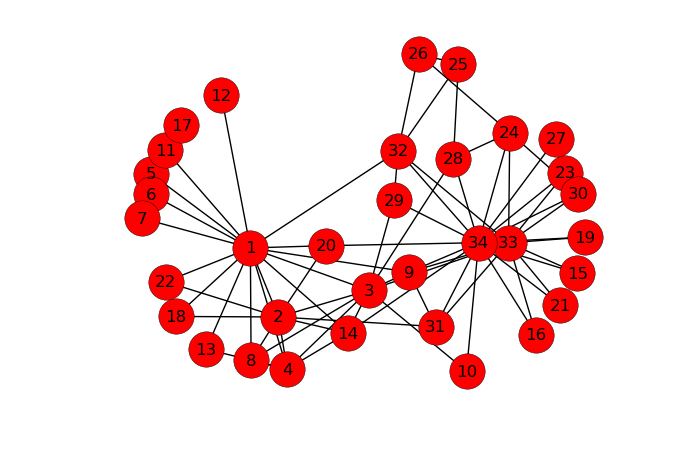

In [6]:
# Displaying the karate class as a graph
spring_pos = nx.spring_layout(Graph_Karate)
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                pos=spring_pos,
                with_labels = True,
                node_size=650,
                label='Friendship Network')

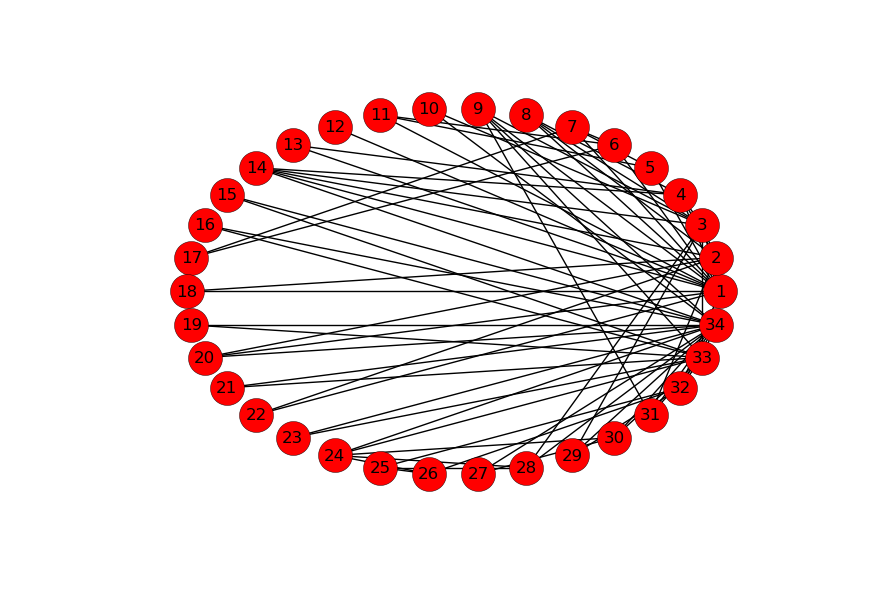

In [7]:
# Displaying the class as a circle
nx.draw_circular(Graph_Karate, 
                 with_labels=True,
                node_size=600)

# Summary Statistics 

We see that there are 34 individuals (nodes) and 78 friendships (edges). The average degree is the average number of edges connected to each node. This is not the same as 78/34, because each friendship includes two nodes but is only counted once in the total number of edges. In this context, each person in the class has on average 4.6 friends.   

In [8]:
# Printing out some summary statistics on the network
print( nx.info(Graph_Karate) )

Name: SocialCircles_KarateClass
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [10]:
# Printing out the average density of the network
print(nx.density(Graph_Karate))

0.139037433155


The average density is calculated as the $$\text{average density} = \frac{\text{actual ties}}{\text{possible number of ties}} $$

where the possible number of ties for an undirected graph (if every node had a tie to every other node) is $\frac{n(n-1)}{2}$. 

If every node were connected to every other node, the average density would be 1. If there were no ties between any of the nodes, the average density would be 0. The average density of this network is 0.14, which indicates it is relatively not a very dense network.

# Degree Distribution 

**Q: Who has the most friends?**

We can cast this question as a network analysis problem by asking *which node has the most edges*. 

In [9]:
dict_degree = Graph_Karate.degree()
df_degree = pd.DataFrame.from_dict(dict_degree, orient='index')
df_degree.columns=['degree']
df_degree.index.name = 'node_id'

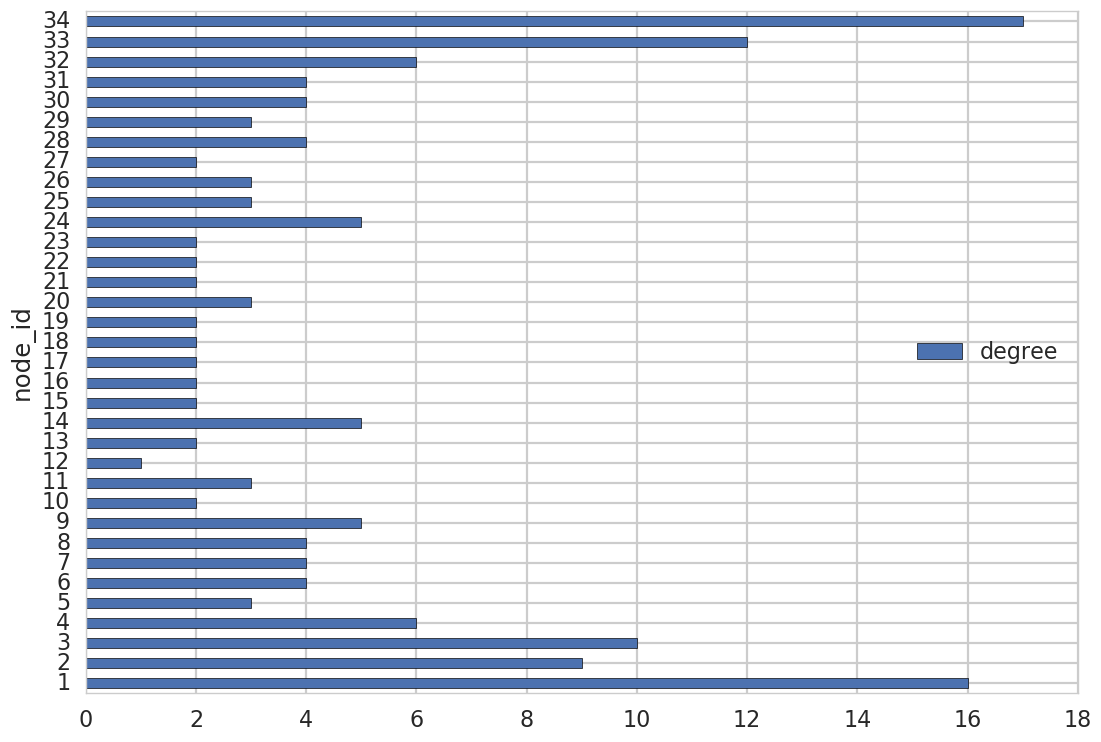

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.00, rc={"lines.linewidth": 1.00,"lines.markersize":8})
df_degree.plot(kind='barh')

From this figure we can see that nodes 1, 34, and 33 are the most connected, meaning they have the most friendships out of the group. 12 is the only individual that has only one connection. There are a few individuals who have 10 friends and the rest in the class have around 2 to 5 friendships. It makes sense that 1 and 34 have the most social connections, because they are the leaders of the rival factions. 

# Shortest Paths

The **shortest path** between two nodes is the smallest number of nodes that you must touch to get from one node to the other (not repeating any nodes). One way to think of this is how many people it takes to broker an introduction (think [six degrees of Kevin Bacon](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon)).

In [11]:
#shortest path length
ls_path = nx.shortest_path(Graph_Karate, 12,15)
print('The path length from {} to {} is {}.'.format(
                                            12,15,len(ls_path)))
print('path length: ', ls_path)

The path length from 12 to 15 is 5.
path length:  [12, 1, 32, 33, 15]


## Average Shortest Path Length

The **average shortest path length** is a network measure describing how quickly information or goods can disburse through the network.

The average shortest length $l$ is defined as $$ l = \frac{1}{n(n-1)} \sum_{i \ne j}d(v_{i},v_{j}) $$ where $n$ is the number of nodes and $d(v_{i},v_{j})$ is the shortest path length between nodes $i$ and $j$. 

In [12]:
print(nx.average_shortest_path_length(Graph_Karate))

2.40819964349


The average shortest path in this network is 2.5 nodes, which implies information can be transferred between on any two nodes on average between 2.5 people. If the average shortest path is very few individuals, then information or goods can dispel very quickly throughout, as in the case of a contagious disease spreading in an area where the population is highly concentrated. A longer average shortest path would indicate slower transfer.  

# Centrality Metrics

Centrality metrics measure how important a node is, or how "central" it is to the network. These can indicate what individual has the most social contacts, who is closest to people, or the person where information most transfers through. There are many **centrality metrics** -- degree centrality, betweenness centrality, closeness centrality, eigenvalue centrality, percolation centrality, PageRank -- all capturing different aspects of a node's contribution to a network. Typically, we use centrality metrics to identify and describe a few import nodes, but they don't tell us much about the rest of the nodes in the network. This is akin to Google's search results: the first few matches are the most relevant, but if you go a few pages in to the search results, you might as well have been searching for something else entirely.

## Degree Centrality

**Degree centrality** considers the node with the most connections to be the most important. 

$$C_{d}(n) = \frac{deg(n)}{n-1}$$ where $n$ is a node and $deg(n)$ is the number of connections that a node has, and $n-1$ is a normalization factor for the total amount of possible connections. In our case, it is the person with the most friends.

In [13]:
dict_degree_centrality = nx.degree_centrality(Graph_Karate)
df_degree_centrality = pd.DataFrame.from_dict(dict_degree_centrality, orient='index')
df_degree_centrality.columns=['degree_centrality']
df_degree_centrality.index.name = 'node_id'

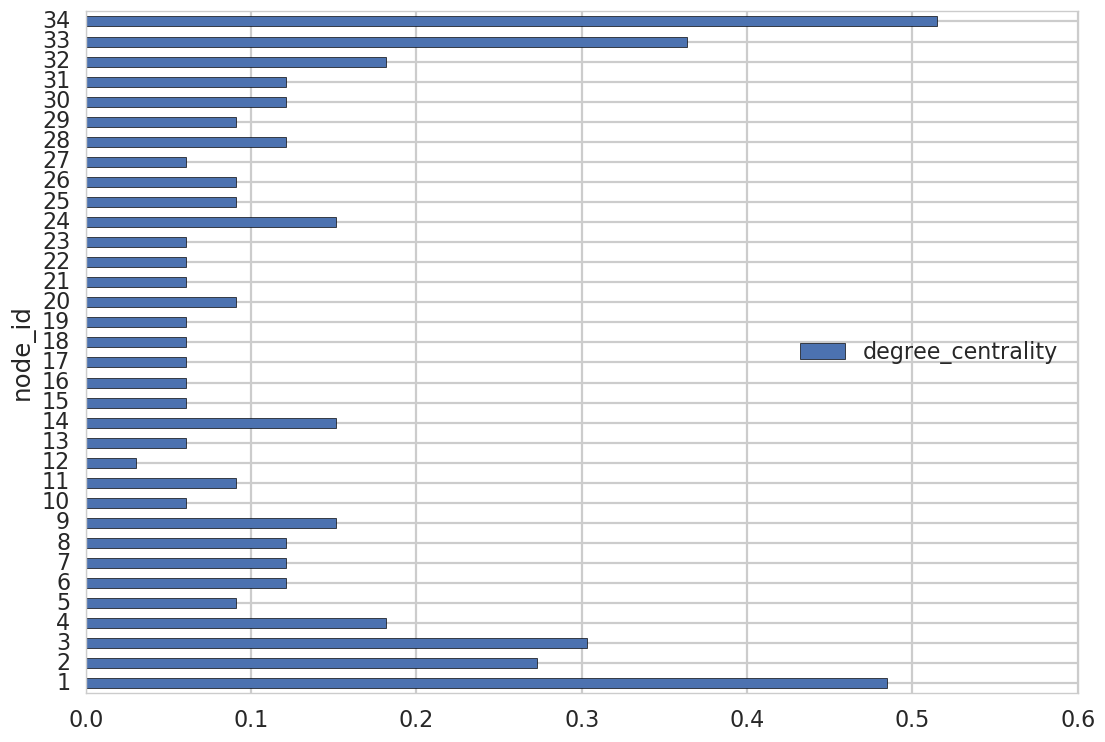

In [14]:
df_degree_centrality.plot(kind='barh')

As we can see this is a recasting of the [degree distribution](#degree-distribution), where 1 and 34 have the largest degree centralities and have the largest freindships.

## Closeness Centrality

**Closeness centrality** is calculated by calculating the shortest path between a given a node and all other nodes $$C(x) = \frac{1}{\sum_{y}d(x,y)} $$
where $C(x)$ is the closeness centrality of $x$ and $d(x,y)$ is the shortest path between nodes $x$ and $y$.

In [15]:
dict_closeness_centrality = nx.closeness_centrality(Graph_Karate)
df_closeness_centrality = pd.DataFrame.from_dict(dict_closeness_centrality,
                                                 orient='index')
df_closeness_centrality.columns=['closeness_centrality']
df_closeness_centrality.index.name = 'node_id'

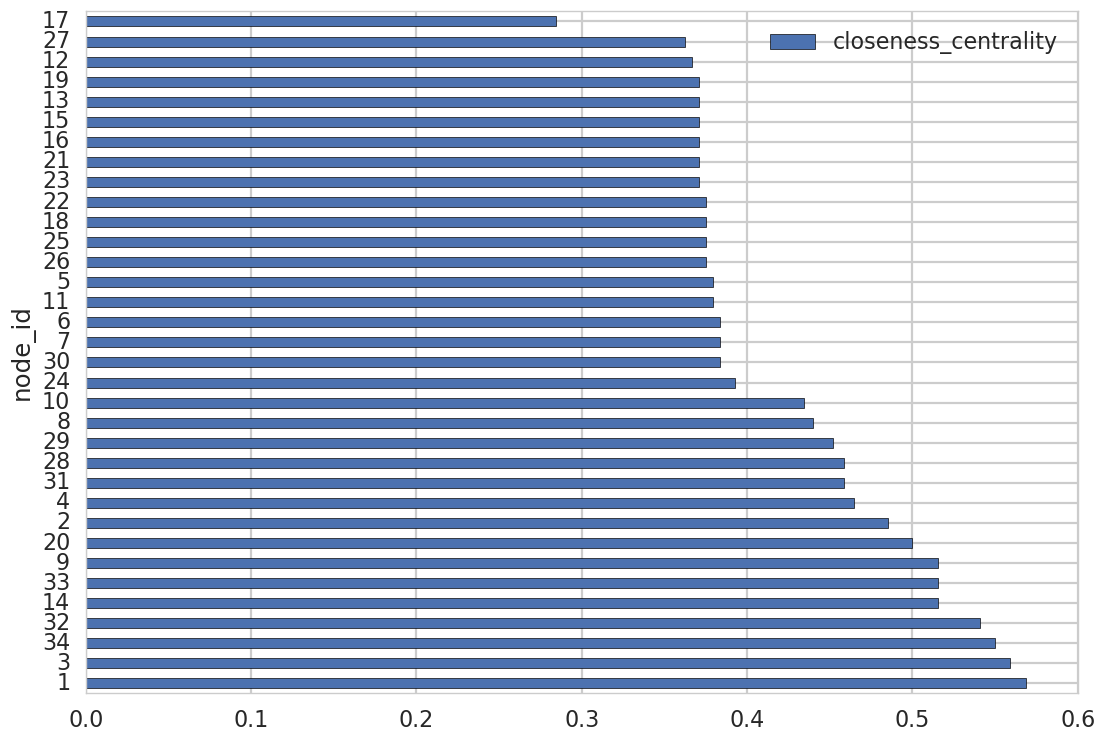

In [16]:
df_closeness_centrality.sort_values(by='closeness_centrality',
                                   ascending=False).plot(kind='barh')

From this distribution 32, 34, 3 and 1 have the highest centrality closeness. This implies that these individuals have the shortest paths to all other members in the network. 

## Betweenness Centrality

**Betweenness centrality** calculates how many shortest paths in a network which include a given node. To find the betweenness centrality $C_n$ of node $n$, take a node pair $s$ and $t$ and compute the shortest path between them. (It is possible to have multiple shortest paths between a pair of nodes if there are two distinct paths of the same length connecting the two nodes.) Next, determine the fraction of these paths which contain node $n$. Repeating this for all pairs of nodes and summing all of them, we have
$$ C_{n} = \sum_{s,t} \frac{\sigma_{st}(n)}{\sigma_{st}}$$ where $\sigma_{st}$ is the number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(n)$ is the number of shortest paths $\sigma_{st}$ passing through node $n$. 

% include some intuition about betweenness centrality

In [17]:
dict_betweenness_centrality = nx.betweenness_centrality(Graph_Karate)
df_betweenness_centrality = pd.DataFrame.from_dict(dict_betweenness_centrality,
                                                 orient='index')
df_betweenness_centrality.columns=['betweeness_centrality']
df_betweenness_centrality.index.name = 'node_id'

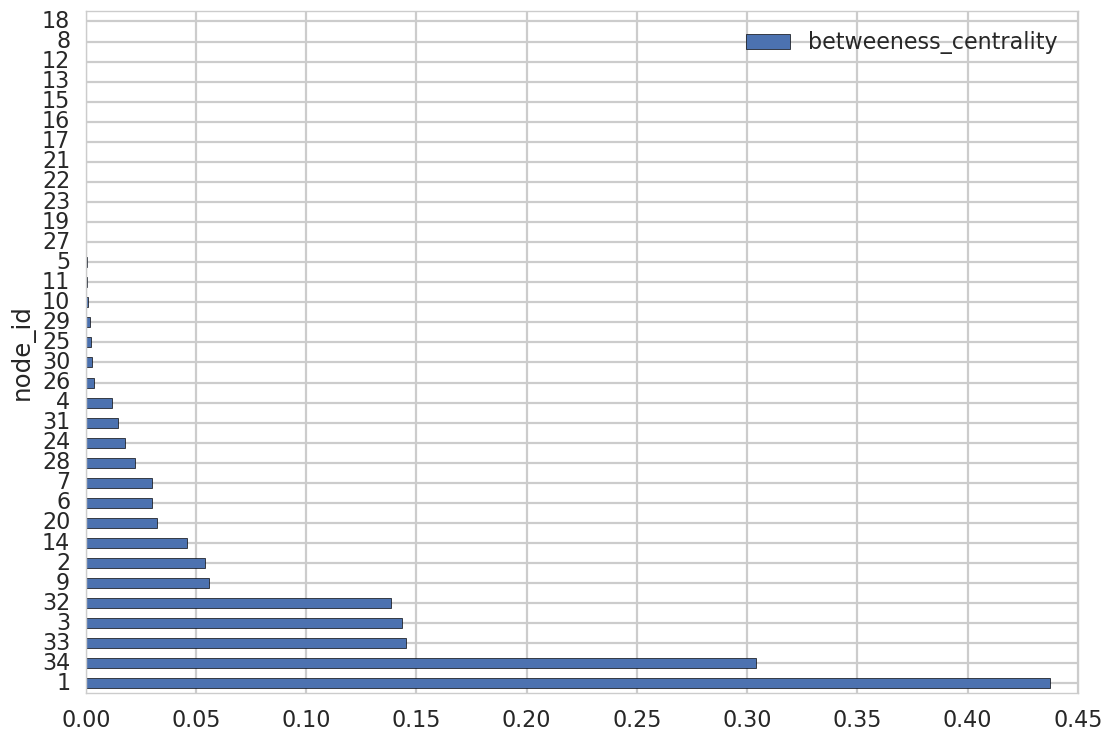

In [18]:
df_betweenness_centrality.sort_values(by='betweeness_centrality',
                                   ascending=False).plot(kind='barh')

The people with the highest betwenness centrality are 34 and 1 which we expect due to their high connectivity. 

# Community Detection 

In **community detection**, we are often trying to find sub-networks, or communities, of densely populated connections. Community detection is similiar to clustering, in that strong communities will display an abundance of intra-community connections and few inter-community connections. From our analysis of the karate class, we know that there were two communities that associated mostly within themselves and didn't cross-pollinate much. Assuming we didn't know that beforehand, let's see if we can identify these two communities from looking at the data.

The technical implementation of the algorithm can be found [here](https://arxiv.org/pdf/0803.0476v2.pdf).  

1's Faction: [1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22]

34's Faction: [9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34]

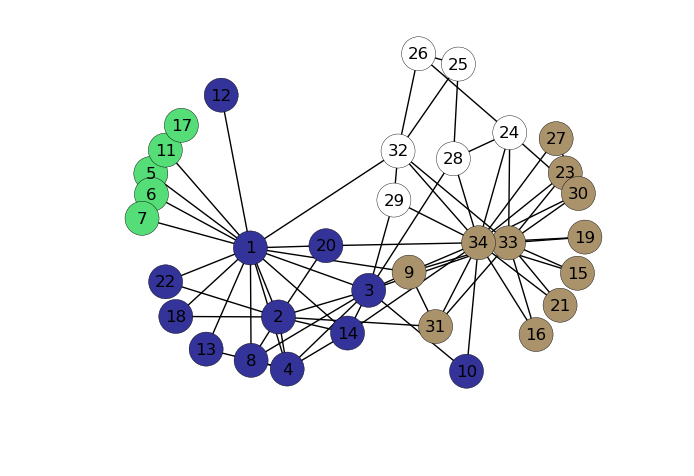

In [18]:
dict_clusters = community.best_partition(Graph_Karate,resolution=1.0)
clusters = [dict_clusters.get(node) for node in Graph_Karate.nodes()]
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                 pos = spring_pos,
                 cmap = plt.get_cmap("terrain"),
                 node_color = clusters, 
                 node_size = 600,
                 with_labels = True,
                 fontsize=200)


We've identified 4 different sub-clusters within the network. We know that the karate class fractured into two different sub-clusters. Let's combine the sub-clusters into two-subclusters and see how we do. 

In [14]:
make_new_clust = lambda x: 0 if x < 2 else 1
dict_new_clust = {key: make_new_clust(dict_clusters[key]) for key in dict_clusters}

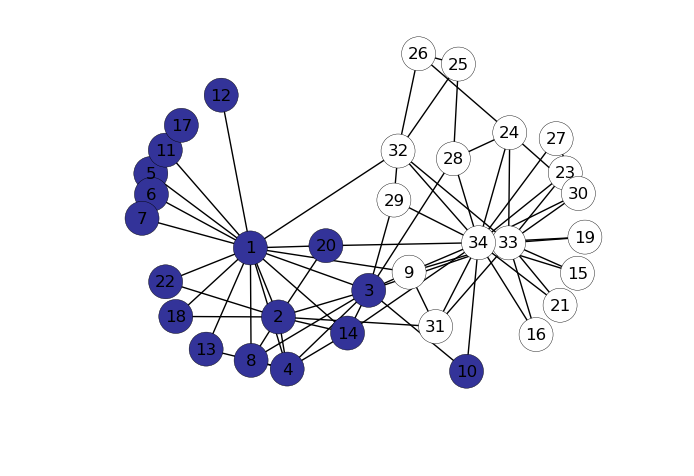

In [19]:
ls_new_clust = [dict_new_clust.get(node) for node in Graph_Karate.nodes()]
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                 pos = spring_pos,
                 cmap=plt.get_cmap("terrain"),
                 node_color = ls_new_clust, 
                 node_size = 600,
                 with_labels = True,
                 fontsize=200)

If we look at the alliances given in the original paper we can see that we can properly identify the alliances with 1 and 34 with the exeption of 10. 10 seems to be a case that had close social ties to both 1 and 34.  

[Back to TOC](#Table-of-Contents)